# Configuração e preparação dos Dados


---



In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"

In [2]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 96% 49.0M/50.9M [00:04<00:00, 17.2MB/s]
100% 50.9M/50.9M [00:04<00:00, 13.1MB/s]


In [3]:
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [4]:
!ls

drive					    quality-prediction-in-a-mining-process.zip
MiningProcess_Flotation_Plant_Database.csv  sample_data


Importando bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importanto TensorFlow

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, SimpleRNN, LSTM, Lambda, GlobalAveragePooling1D, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD

In [7]:
raw_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=',')
raw_data.head()

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  Flotation Column 07 Air Flow  \
0                       253.235  ...                       250.884   
1                       250.532  ...                       248.994   
2                       247.874  ...                       248.071   
3                       254.487  ...                       251.147   
4                       252.136  ...                       248.928   

   Flotation Column 01 Level  Flotation Column 02 Level  \
0                    457.396                    432.962   
1                    451.891                    429.560   
2                    451.240                    468.927   
3                    452.441                    458.165   
4                    452.441                    452.900   

   Flotation Column 03 Level  Flotation Column 04 Level  \
0                    424.954                    443.558   
1                    432.939                    448.086   
2                    434.610                    449.688   
3                    442.865                    446.210   
4                    450.523                    453.670   

   Flotation Column 05 Level  Flotation Column 06 Level  \
0                    502.255                    446.370   
1                    496.363                    445.922   
2                    484.411                    447.826   
3                    471.411                    437.690   
4                    462.598                    443.682   

   Flotation Column 07 Level  % Iron Concentrate  % Silica Concentrate  
0                    523.344               66.91                  1.31  
1                    498.075               66.91                  1.31  
2                    458.567               66.91                  1.31  
3                    427.669               66.91                  1.31  
4                    425.679               66.91                  1.31  

[5 rows x 24 columns]

In [8]:
datidx = pd.to_datetime(raw_data['date'])
raw_data.index = datidx
raw_data.drop('date',axis=1,inplace= True)

In [9]:
df= raw_data[raw_data['% Silica Concentrate'].shift() != raw_data['% Silica Concentrate']]
df_resampled = df.resample('H').last().round(2)
df_resampled


% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00        55.20          16.98      3019.53      557.43   
2017-03-10 02:00:00        55.20          16.98      3170.41      539.67   
2017-03-10 03:00:00        55.20          16.98      3365.65      573.52   
2017-03-10 04:00:00        55.20          16.98      2693.75      592.13   
2017-03-10 05:00:00        55.20          16.98      2352.22      601.81   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00        49.75          23.20      2888.06      494.99   
2017-09-09 20:00:00        49.75          23.20      4218.57      492.03   
2017-09-09 21:00:00        49.75          23.20      3159.10      520.99   
2017-09-09 22:00:00        49.75          23.20      3348.19      511.96   
2017-09-09 23:00:00        49.75          23.20      2983.08      461.28   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00         395.71        10.07              1.74   
2017-03-10 02:00:00         399.70        10.16              1.67   
2017-03-10 03:00:00         399.02        10.09              1.71   
2017-03-10 04:00:00         409.20         9.95              1.72   
2017-03-10 05:00:00         398.14         9.84              1.76   
...                            ...          ...               ...   
2017-09-09 19:00:00         376.47         9.28              1.67   
2017-09-09 20:00:00         378.63         9.16              1.65   
2017-09-09 21:00:00         381.47         9.58              1.74   
2017-09-09 22:00:00         379.68         9.89              1.74   
2017-09-09 23:00:00         378.69         9.68              1.69   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                        249.21   
2017-03-10 02:00:00                        249.29   
2017-03-10 03:00:00                        249.38   
2017-03-10 04:00:00                        248.30   
2017-03-10 05:00:00                        248.95   
...                                           ...   
2017-09-09 19:00:00                        317.06   
2017-09-09 20:00:00                        302.08   
2017-09-09 21:00:00                        296.06   
2017-09-09 22:00:00                        301.65   
2017-09-09 23:00:00                        301.38   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                        253.24   
2017-03-10 02:00:00                        248.27   
2017-03-10 03:00:00                        253.31   
2017-03-10 04:00:00                        251.91   
2017-03-10 05:00:00                        246.31   
...                                           ...   
2017-09-09 19:00:00                        297.75   
2017-09-09 20:00:00                        301.35   
2017-09-09 21:00:00                        298.48   
2017-09-09 22:00:00                        298.36   
2017-09-09 23:00:00                        298.83   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                        250.58  ...   
2017-03-10 02:00:00                        248.31  ...   
2017-03-10 03:00:00                        252.09  ...   
2017-03-10 04:00:00                        251.12  ...   
2017-03-10 05:00:00                        248.07  ...   
...                                           ...  ...   
2017-09-09 19:00:00                        301.68  ...   
2017-09-09 20:00:00                        300.54  ...   
2017-09-09 21:00:00                        299.08  ...   
2017-09-09 22:00:00                        298.23  ...   
2017-09-09 23:00:00                        297.99  ...   


In [10]:
df_resampled['% Silica Concentrate delay'] = df_resampled['% Silica Concentrate'].shift(freq= '-2h')
df_resampled['% Iron Concentrate delay'] = df_resampled['% Iron Concentrate'].shift(freq= '-2h')
df_resampled

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00        55.20          16.98      3019.53      557.43   
2017-03-10 02:00:00        55.20          16.98      3170.41      539.67   
2017-03-10 03:00:00        55.20          16.98      3365.65      573.52   
2017-03-10 04:00:00        55.20          16.98      2693.75      592.13   
2017-03-10 05:00:00        55.20          16.98      2352.22      601.81   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00        49.75          23.20      2888.06      494.99   
2017-09-09 20:00:00        49.75          23.20      4218.57      492.03   
2017-09-09 21:00:00        49.75          23.20      3159.10      520.99   
2017-09-09 22:00:00        49.75          23.20      3348.19      511.96   
2017-09-09 23:00:00        49.75          23.20      2983.08      461.28   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00         395.71        10.07              1.74   
2017-03-10 02:00:00         399.70        10.16              1.67   
2017-03-10 03:00:00         399.02        10.09              1.71   
2017-03-10 04:00:00         409.20         9.95              1.72   
2017-03-10 05:00:00         398.14         9.84              1.76   
...                            ...          ...               ...   
2017-09-09 19:00:00         376.47         9.28              1.67   
2017-09-09 20:00:00         378.63         9.16              1.65   
2017-09-09 21:00:00         381.47         9.58              1.74   
2017-09-09 22:00:00         379.68         9.89              1.74   
2017-09-09 23:00:00         378.69         9.68              1.69   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                        249.21   
2017-03-10 02:00:00                        249.29   
2017-03-10 03:00:00                        249.38   
2017-03-10 04:00:00                        248.30   
2017-03-10 05:00:00                        248.95   
...                                           ...   
2017-09-09 19:00:00                        317.06   
2017-09-09 20:00:00                        302.08   
2017-09-09 21:00:00                        296.06   
2017-09-09 22:00:00                        301.65   
2017-09-09 23:00:00                        301.38   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                        253.24   
2017-03-10 02:00:00                        248.27   
2017-03-10 03:00:00                        253.31   
2017-03-10 04:00:00                        251.91   
2017-03-10 05:00:00                        246.31   
...                                           ...   
2017-09-09 19:00:00                        297.75   
2017-09-09 20:00:00                        301.35   
2017-09-09 21:00:00                        298.48   
2017-09-09 22:00:00                        298.36   
2017-09-09 23:00:00                        298.83   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                        250.58  ...   
2017-03-10 02:00:00                        248.31  ...   
2017-03-10 03:00:00                        252.09  ...   
2017-03-10 04:00:00                        251.12  ...   
2017-03-10 05:00:00                        248.07  ...   
...                                           ...  ...   
2017-09-09 19:00:00                        301.68  ...   
2017-09-09 20:00:00                        300.54  ...   
2017-09-09 21:00:00                        299.08  ...   
2017-09-09 22:00:00                        298.23  ...   
2017-09-09 23:00:00                        297.99  ...   


In [11]:
df_resampled.dropna(inplace=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2017-03-10 01:00:00 to 2017-09-09 21:00:00
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3490 non-null   float64
 1   % Silica Feed                 3490 non-null   float64
 2   Starch Flow                   3490 non-null   float64
 3   Amina Flow                    3490 non-null   float64
 4   Ore Pulp Flow                 3490 non-null   float64
 5   Ore Pulp pH                   3490 non-null   float64
 6   Ore Pulp Density              3490 non-null   float64
 7   Flotation Column 01 Air Flow  3490 non-null   float64
 8   Flotation Column 02 Air Flow  3490 non-null   float64
 9   Flotation Column 03 Air Flow  3490 non-null   float64
 10  Flotation Column 04 Air Flow  3490 non-null   float64
 11  Flotation Column 05 Air Flow  3490 non-null   float64
 12  Flotation Column 06 Air Fl

In [12]:
df_resampled['Air Flow Mean'] = df_resampled[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow']].mean(axis=1)
df_resampled['Level Mean'] = df_resampled[['Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level']].mean(axis=1)


In [13]:
features = [
    'Amina Flow',
    'Ore Pulp pH',
    'Flotation Column 01 Air Flow',
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level',
    '% Iron Concentrate delay',
]

features_agg = [
    'Amina Flow',
    'Ore Pulp pH',
    'Air Flow Mean',
    'Level Mean',
    '% Iron Concentrate delay',
]

target = ['% Silica Concentrate delay']

# SGD with MSE


In [625]:
#Definindo Parametros
early_stop_patience = 30
reduce_on_plateau_patience = 20
loss_f = 'mse'
otimizador = 'sgd'

## Modelos utilizando todas as features e normalizadas por Min-Max

---

In [626]:
x=df_resampled[features]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [627]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 10) (2233, 1)
(559, 10) (559, 1)
(698, 10) (698, 1)


In [628]:
#Criando DF para resultado
result_minmax_full = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

In [629]:
number_features = x_train.shape[1]

### NN

In [630]:
nn = Sequential([
  Input(shape=(number_features,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1)
])

nn.summary()

Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)                    │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [631]:
# Compile the model
nn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
nn.fit(
    x_train,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7269 - val_loss: 1.2220 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1505 - val_loss: 0.8215 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7223 - val_loss: 0.5161 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4932 - val_loss: 0.3761 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5201 - val_loss: 0.3889 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4262 - val_loss: 0.3944 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4537 - val_loss: 0.3684 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4789 - val_loss: 0.3595 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4427 - val_loss: 0.3611 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

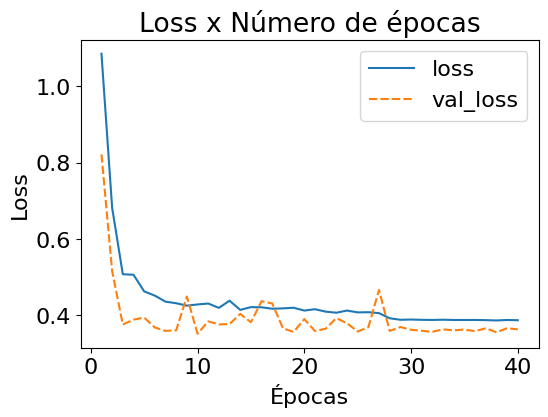

In [632]:
# Plot the training and validation loss
history_f = pd.DataFrame(nn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MAE =  0.45132354611787473
MSE =  0.3521020862180286
R2 =  0.7051163006566457


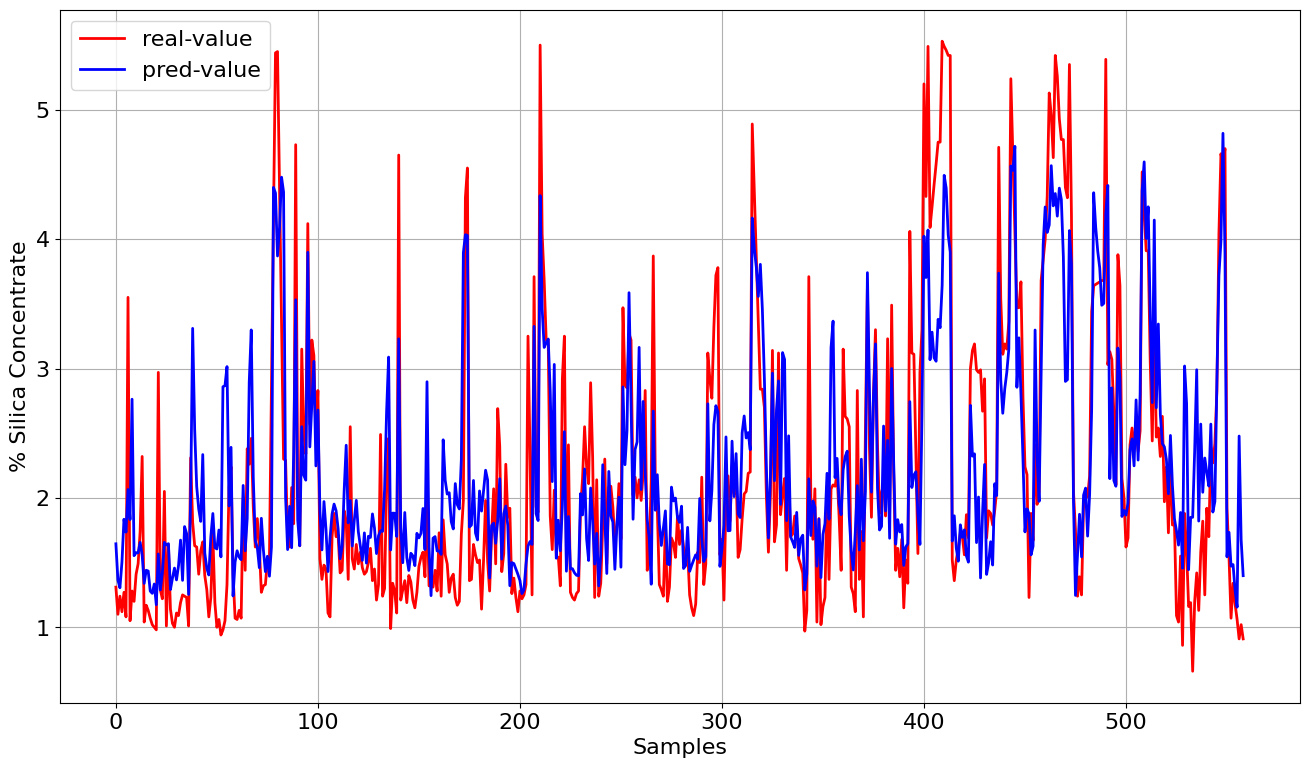

In [633]:
prediction = nn.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_full.loc[len(result_minmax_full)] = ['NN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### RNN

In [634]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))
rnn = Sequential([
    Input(shape=(None,number_features)),
    SimpleRNN(2048, activation='relu'),
    Dense(1)
])

rnn.summary()

Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_37 (SimpleRNN)            │ (None, 2048)                │       4,216,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,218,881 (16.09 MB)

 Trainable params: 4,218,881 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [635]:
# Compile the model
rnn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )

# Train the model
rnn.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.3196 - val_loss: 1.2476 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3723 - val_loss: 1.0152 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1246 - val_loss: 0.9210 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9594 - val_loss: 0.7482 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7996 - val_loss: 0.6850 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6554 - val_loss: 0.5895 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5546 - val_loss: 0.5047 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5218 - val_loss: 0.4724 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5175 - val_loss: 0.4481 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

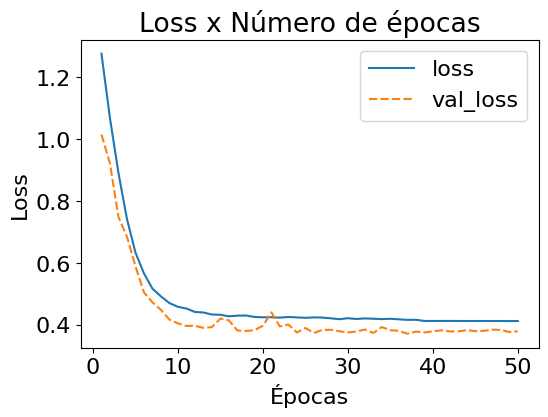

In [636]:
# Plot the training and validation loss
history_f = pd.DataFrame(rnn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
MAE =  0.46353364336682557
MSE =  0.37092915791289394
R2 =  0.6893487242448811


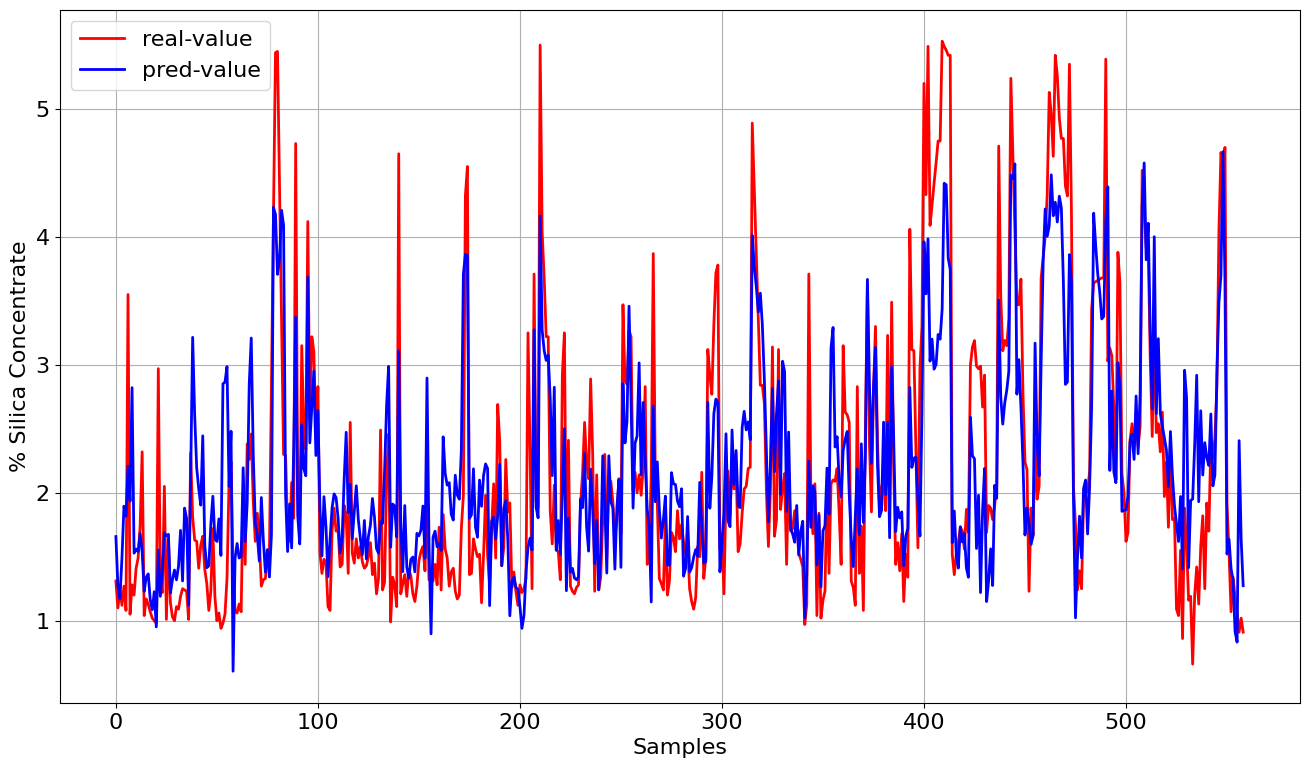

In [637]:
prediction = rnn.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_full.loc[len(result_minmax_full)] = ['RNN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### LSTM

In [638]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))

lstm = Sequential([
    Input(shape=(None,number_features)),
    LSTM(2048, activation='relu'),
    Dense(1)
])

lstm.summary()

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 2048)                │      16,867,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_252 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,869,377 (64.35 MB)

 Trainable params: 16,869,377 (64.35 MB)

 Non-trainable params: 0 (0.00 B)

In [639]:
# Compile the model
lstm.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
lstm.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.3557 - val_loss: 1.2387 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3687 - val_loss: 1.2275 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3424 - val_loss: 1.2307 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3085 - val_loss: 1.2204 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2495 - val_loss: 1.2139 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2779 - val_loss: 1.2041 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2579 - val_loss: 1.1997 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2419 - val_loss: 1.1945 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2504 - val_loss: 1.1808 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

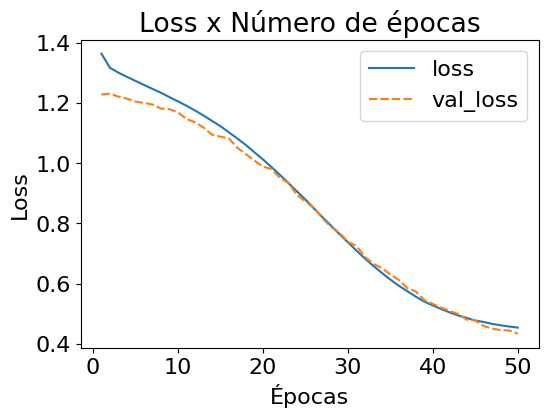

In [640]:
# Plot the training and validation loss
history_f = pd.DataFrame(lstm.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MAE =  0.4636530288941958
MSE =  0.367811293498663
R2 =  0.6919599197717095


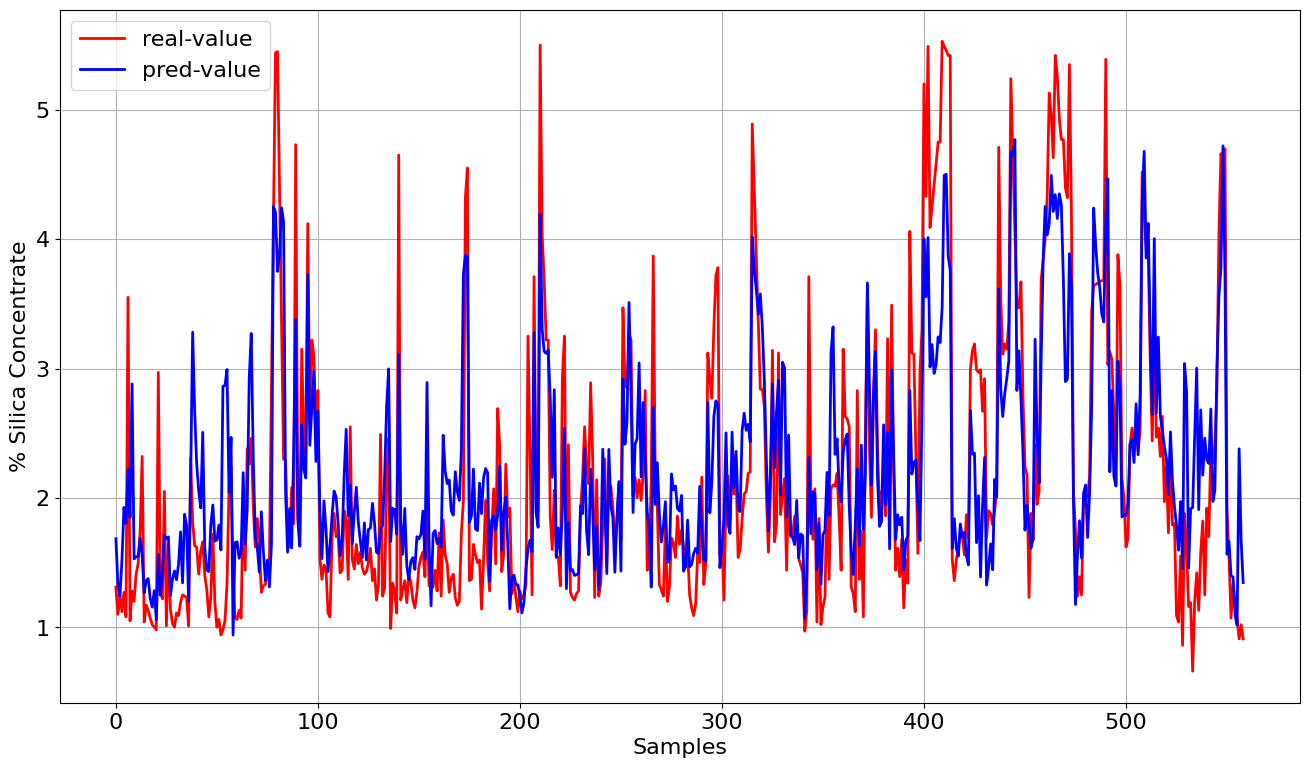

In [641]:
prediction = lstm.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_full.loc[len(result_minmax_full)] = ['LSTM', mae, mse, r2]
print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Modelos utilizando todas as features e normalizadas por z-norm

---

In [642]:
x=df_resampled[features]
y=df_resampled[target]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [643]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 10) (2233, 1)
(559, 10) (559, 1)
(698, 10) (698, 1)


In [644]:
#Criando DF para resultado
result_znorm_full = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

In [645]:
number_features = x_train.shape[1]

### NN

In [646]:
nn = Sequential([
  Input(shape=(number_features,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1)
])

nn.summary()

Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_253 (Dense)                    │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [647]:
# Compile the model
nn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )

# Train the model
nn.fit(
    x_train,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.0803 - val_loss: 0.4280 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4950 - val_loss: 0.3852 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4773 - val_loss: 0.3702 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4400 - val_loss: 0.3894 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4021 - val_loss: 0.3912 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4268 - val_loss: 0.4090 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3901 - val_loss: 0.3892 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3988 - val_loss: 0.3980 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3681 - val_loss: 0.4088 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

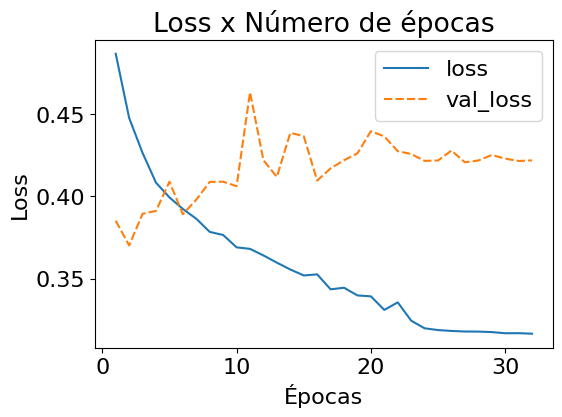

In [648]:
# Plot the training and validation loss
history_f = pd.DataFrame(nn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE =  0.46406847967444687
MSE =  0.37018811067219476
R2 =  0.6899693475251143


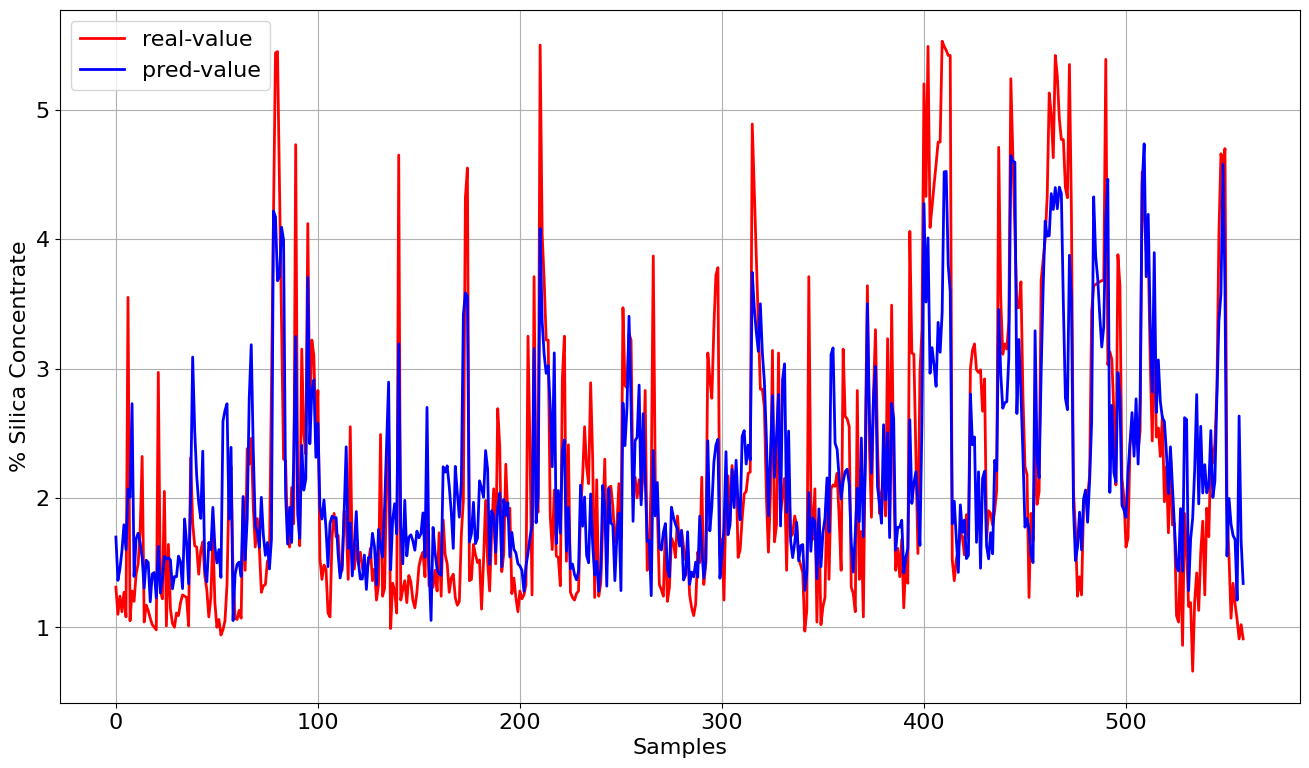

In [649]:
prediction = nn.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_full.loc[len(result_znorm_full)] = ['NN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### RNN

In [650]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))
rnn = Sequential([
    Input(shape=(None,number_features)),
    SimpleRNN(2048, activation='relu'),
    Dense(1)
])

rnn.summary()

Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_38 (SimpleRNN)            │ (None, 2048)                │       4,216,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,218,881 (16.09 MB)

 Trainable params: 4,218,881 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [651]:
# Compile the model
rnn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=25,
            min_delta=0.001,
            min_lr=0.000001,
        )

# Train the model
rnn.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.1965 - val_loss: 0.4077 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5286 - val_loss: 0.3746 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5271 - val_loss: 0.3793 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5004 - val_loss: 0.3853 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4640 - val_loss: 0.3778 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4635 - val_loss: 0.3740 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4485 - val_loss: 0.3852 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4452 - val_loss: 0.3784 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4126 - val_loss: 0.3784 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

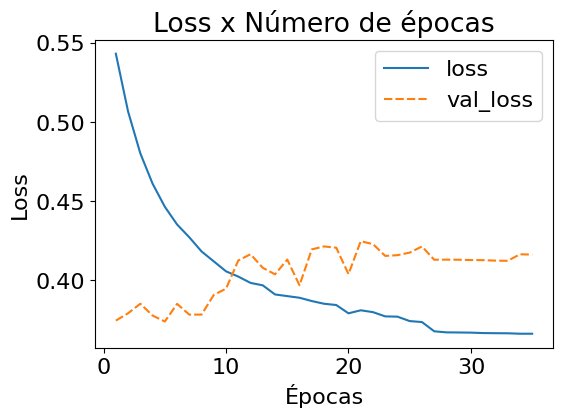

In [652]:
# Plot the training and validation loss
history_f = pd.DataFrame(rnn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


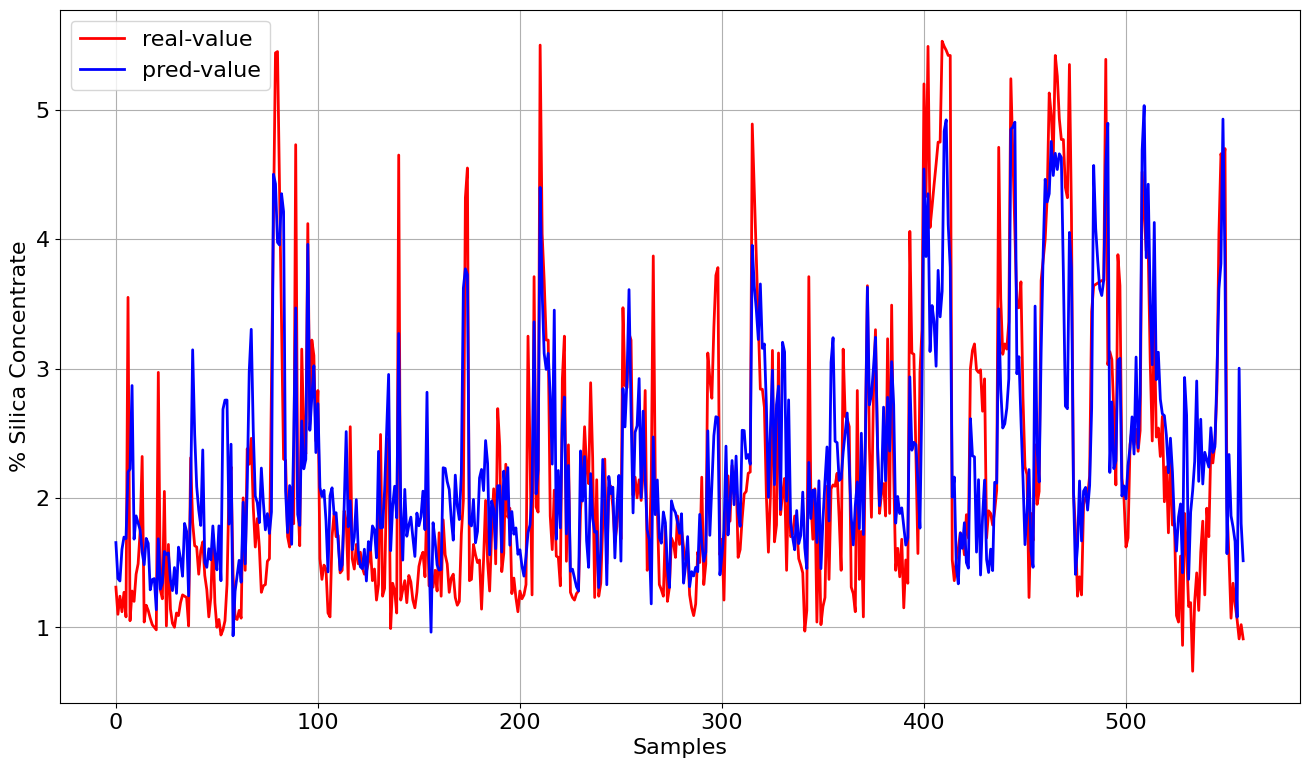

In [653]:
prediction = rnn.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_full.loc[len(result_znorm_full)] = ['RNN', mae, mse, r2]

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### LSTM

In [654]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))

lstm = Sequential([
    Input(shape=(None,number_features)),
    LSTM(2048, activation='relu'),
    Dense(1)
])

lstm.summary()

Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 2048)                │      16,867,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,869,377 (64.35 MB)

 Trainable params: 16,869,377 (64.35 MB)

 Non-trainable params: 0 (0.00 B)

In [655]:
# Compile the model
lstm.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )

# Train the model
lstm.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.4395 - val_loss: 1.2290 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1655 - val_loss: 1.0040 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9074 - val_loss: 0.8820 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7931 - val_loss: 0.7549 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6633 - val_loss: 0.6431 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6039 - val_loss: 0.5535 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5338 - val_loss: 0.4867 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5000 - val_loss: 0.4418 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4741 - val_loss: 0.4111 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

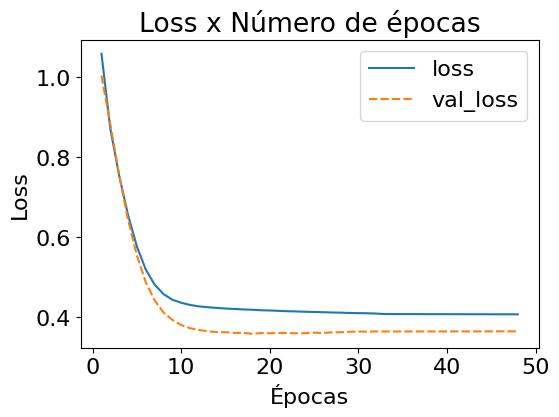

In [656]:
# Plot the training and validation loss
history_f = pd.DataFrame(lstm.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
MAE =  0.46000498012481306
MSE =  0.3579389563061063
R2 =  0.7002279517614529


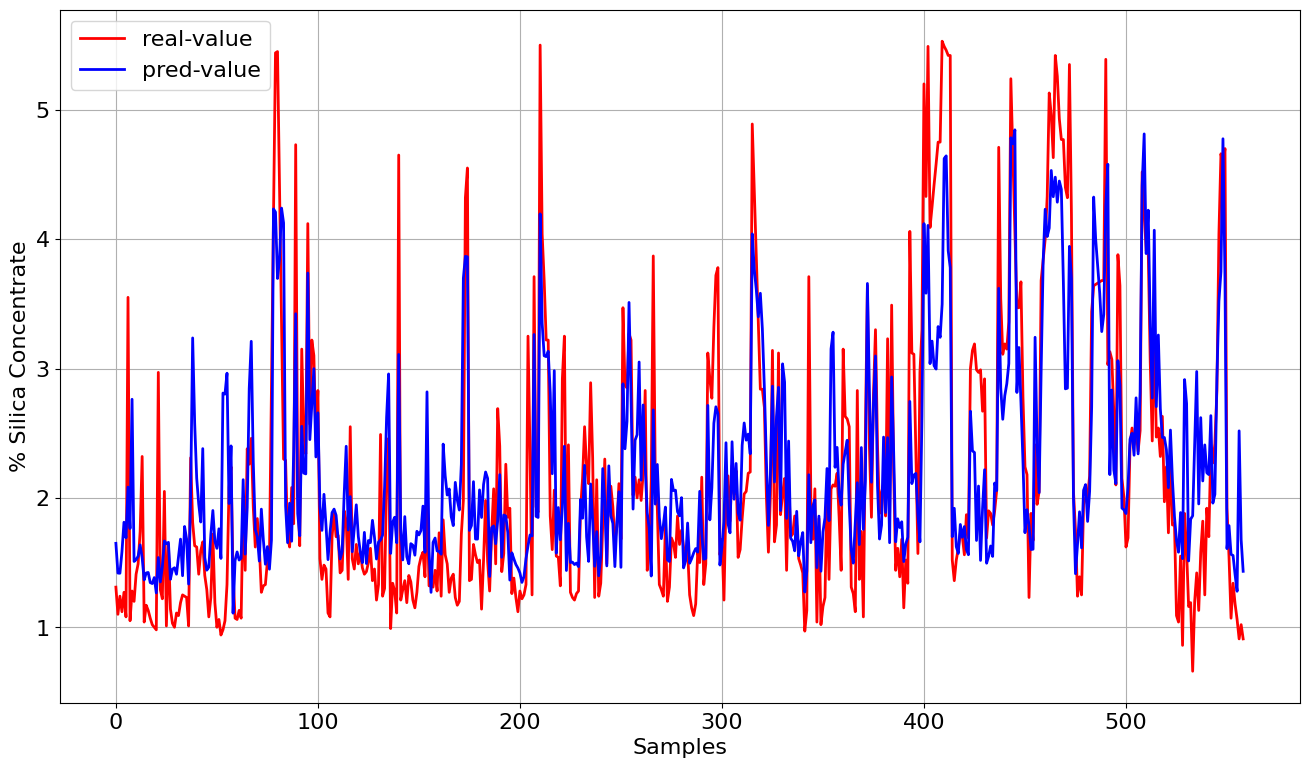

In [657]:
prediction = lstm.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_full.loc[len(result_znorm_full)] = ['LSTM', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Modelos utilizando as features agregadas e normalizadas por Min-Max

---

In [658]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [659]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 5) (2233, 1)
(559, 5) (559, 1)
(698, 5) (698, 1)


In [660]:
#Criando DF para resultado
result_minmax_agg = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

In [661]:
number_features = x_train.shape[1]

### NN

In [662]:
nn = Sequential([
  Input(shape=(number_features,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1)
])

nn.summary()

Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_260 (Dense)                    │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_264 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [663]:
# Compile the model
nn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
nn.fit(
    x_train,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7872 - val_loss: 0.9352 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8644 - val_loss: 0.5172 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5232 - val_loss: 0.4144 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4724 - val_loss: 0.3628 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4651 - val_loss: 0.4399 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4413 - val_loss: 0.3819 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4602 - val_loss: 0.3435 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4231 - val_loss: 0.3476 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4120 - val_loss: 0.5105 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

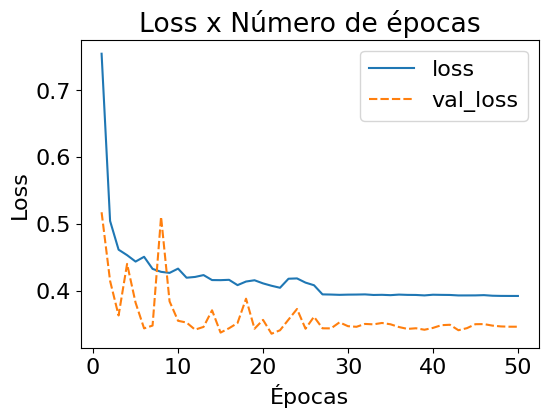

In [664]:
# Plot the training and validation loss
history_f = pd.DataFrame(nn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE =  0.43080361957413565
MSE =  0.33545627740488637
R2 =  0.7190570805426872


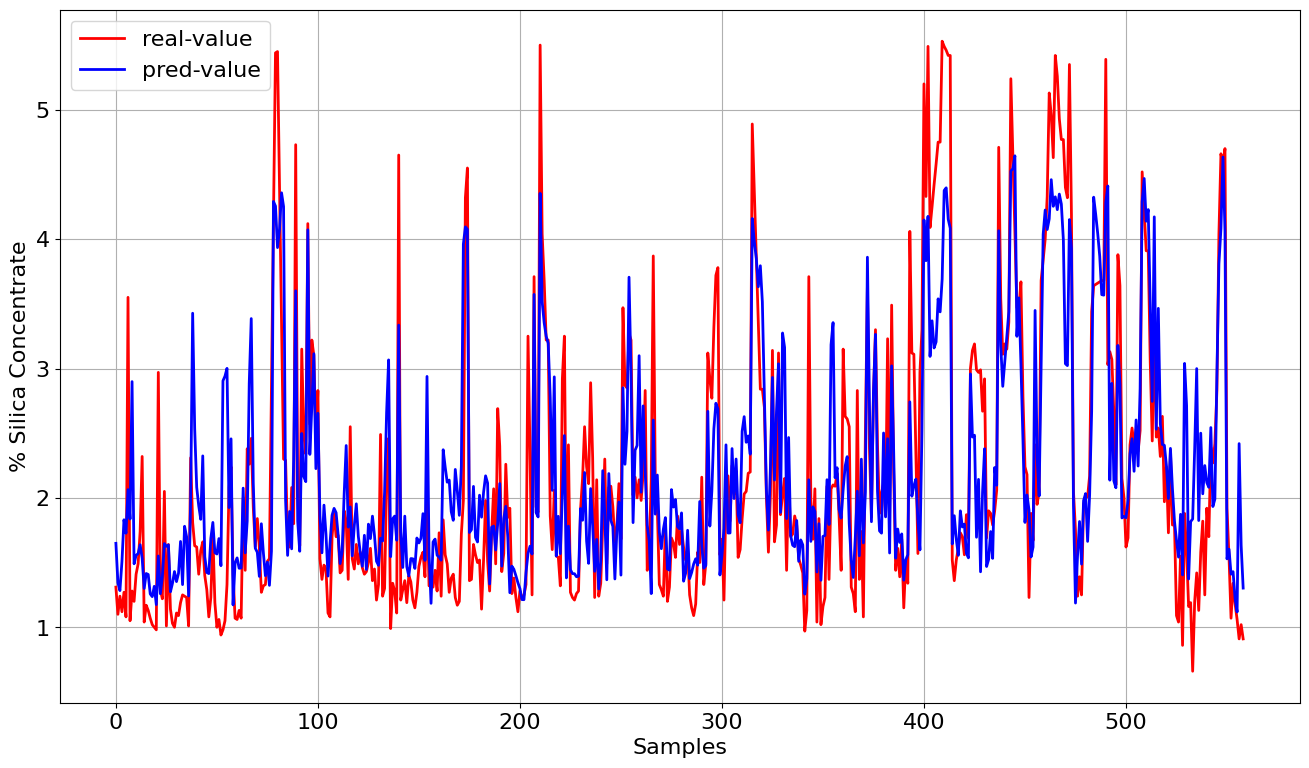

In [665]:
prediction = nn.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_agg.loc[len(result_minmax_agg)] = ['NN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### RNN

In [666]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))
rnn = Sequential([
    Input(shape=(None,number_features)),
    SimpleRNN(2048, activation='relu'),
    Dense(1)
])

rnn.summary()

Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_39 (SimpleRNN)            │ (None, 2048)                │       4,206,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,208,641 (16.05 MB)

 Trainable params: 4,208,641 (16.05 MB)

 Non-trainable params: 0 (0.00 B)

In [667]:
# Compile the model
rnn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
rnn.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7361 - val_loss: 1.1681 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3197 - val_loss: 1.0169 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0780 - val_loss: 0.8950 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8918 - val_loss: 0.7259 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7975 - val_loss: 0.6469 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6171 - val_loss: 0.5959 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5484 - val_loss: 0.4815 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5269 - val_loss: 0.4974 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5118 - val_loss: 0.4331 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

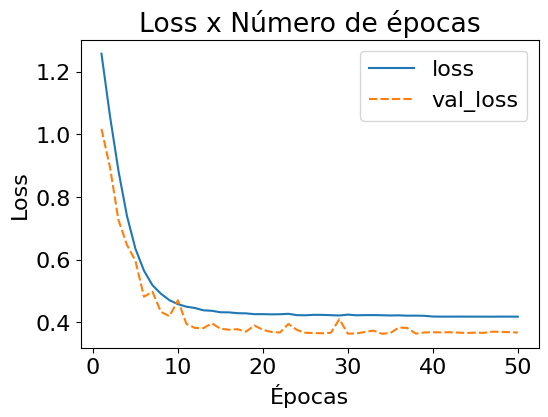

In [668]:
# Plot the training and validation loss
history_f = pd.DataFrame(rnn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE =  0.4581730675057563
MSE =  0.3634656492286212
R2 =  0.6955993746586273


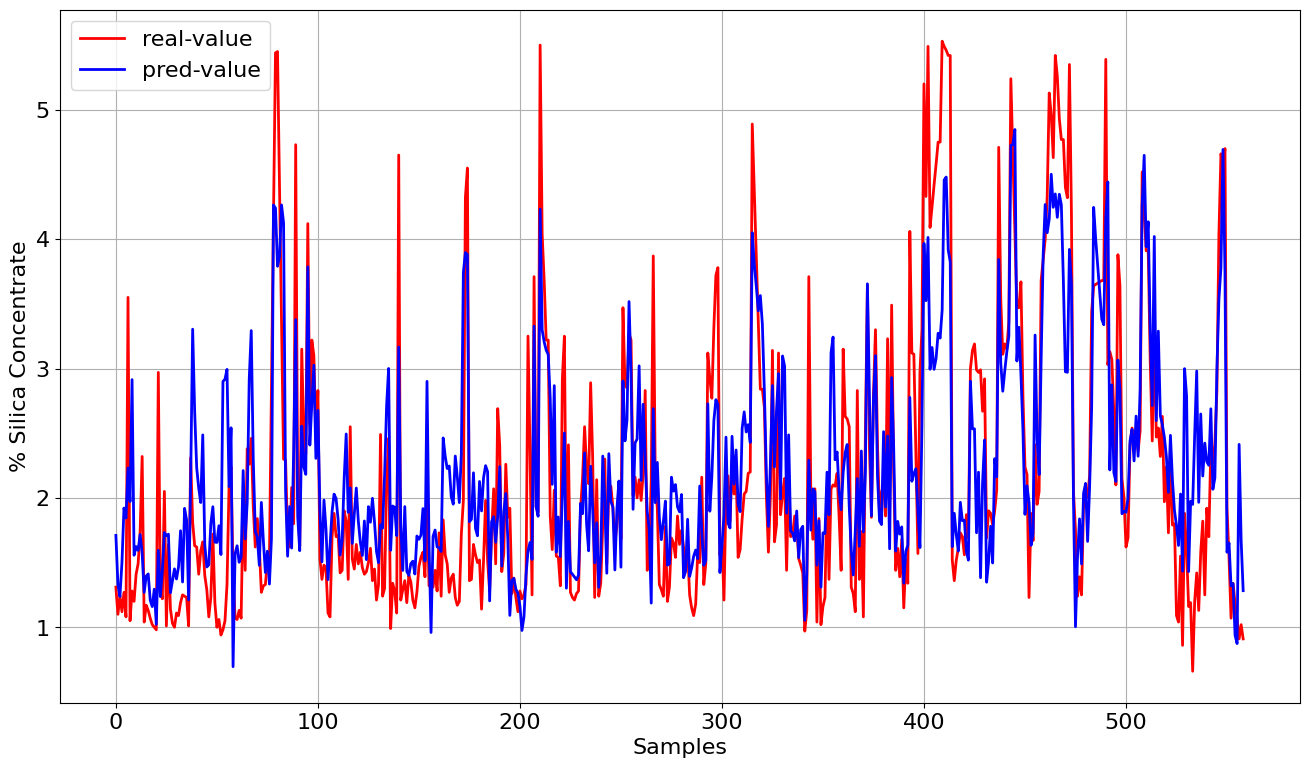

In [669]:
prediction = rnn.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_agg.loc[len(result_minmax_agg)] = ['RNN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### LSTM

In [670]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))

lstm = Sequential([
    Input(shape=(None,number_features)),
    LSTM(2048, activation='relu'),
    Dense(1)
])

lstm.summary()

Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 2048)                │      16,826,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_266 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,828,417 (64.20 MB)

 Trainable params: 16,828,417 (64.20 MB)

 Non-trainable params: 0 (0.00 B)

In [671]:
# Compile the model
lstm.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
lstm.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.3731 - val_loss: 1.2715 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3701 - val_loss: 1.2155 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2074 - val_loss: 1.2342 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2655 - val_loss: 1.2205 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2372 - val_loss: 1.2123 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2548 - val_loss: 1.1963 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2812 - val_loss: 1.1883 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1958 - val_loss: 1.1802 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2323 - val_loss: 1.1745 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

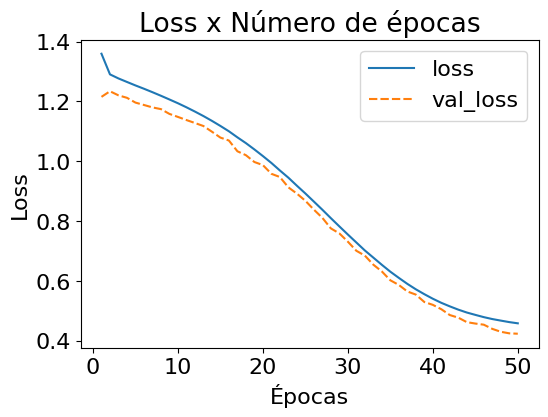

In [672]:
# Plot the training and validation loss
history_f = pd.DataFrame(lstm.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE =  0.45264395822992476
MSE =  0.36042409939097403
R2 =  0.6981466571172357


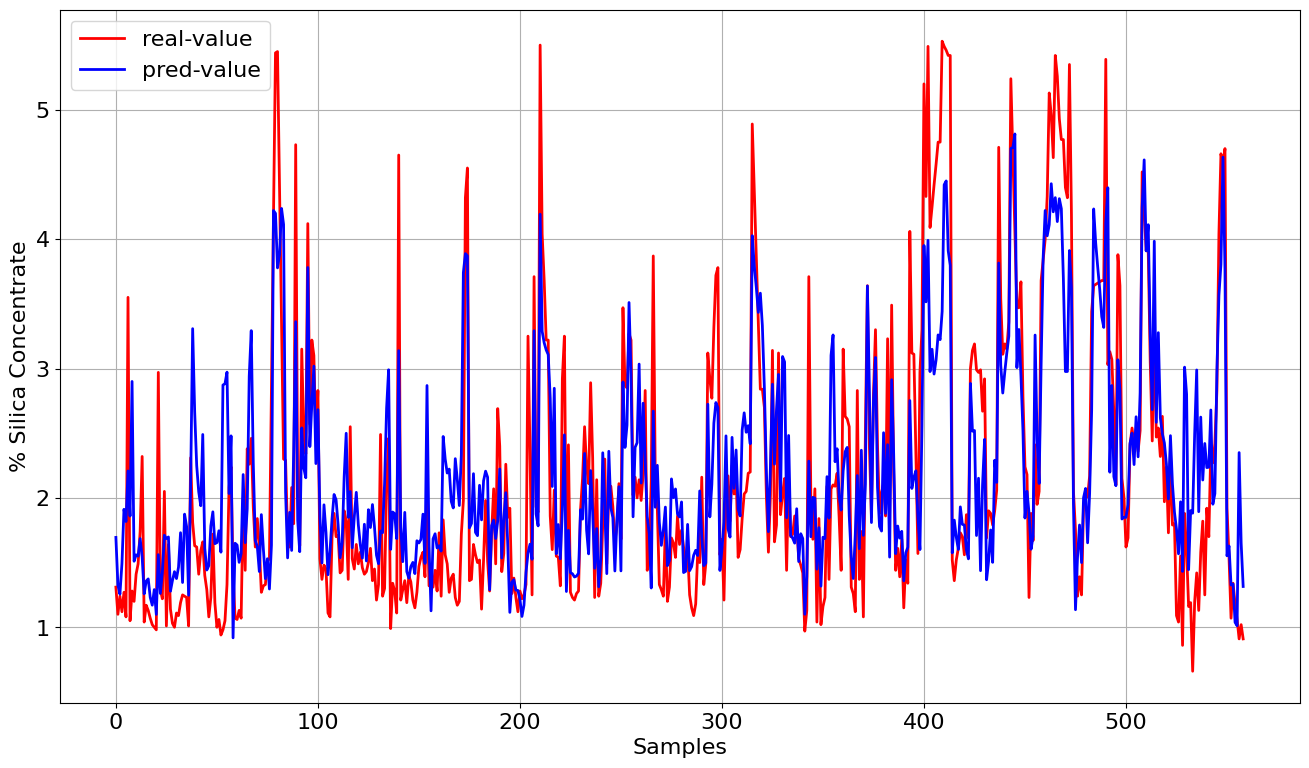

In [673]:
prediction = lstm.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_agg.loc[len(result_minmax_agg)] = ['LSTM', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Modelos utilizando as features agregadas e normalizadas por z-norm

---

In [674]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [675]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 5) (2233, 1)
(559, 5) (559, 1)
(698, 5) (698, 1)


In [676]:
#Criando DF para resultado
result_znorm_agg = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

In [677]:
number_features = x_train.shape[1]

### NN

In [678]:
nn = Sequential([
  Input(shape=(number_features,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1)
])

nn.summary()

Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_267 (Dense)                    │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [679]:
# Compile the model
nn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
nn.fit(
    x_train,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.6375 - val_loss: 0.3759 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4651 - val_loss: 0.3760 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4050 - val_loss: 0.3813 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4176 - val_loss: 0.3893 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3989 - val_loss: 0.3753 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3929 - val_loss: 0.4022 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4127 - val_loss: 0.3841 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3780 - val_loss: 0.3875 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3877 - val_loss: 0.3890 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

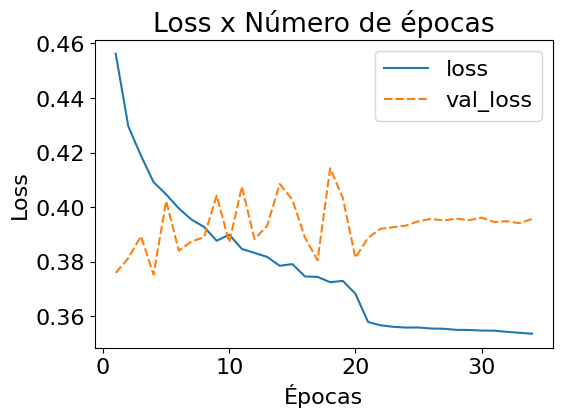

In [680]:
# Plot the training and validation loss
history_f = pd.DataFrame(nn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE =  0.4666445894787265
MSE =  0.3753148836672122
R2 =  0.6856757013195414


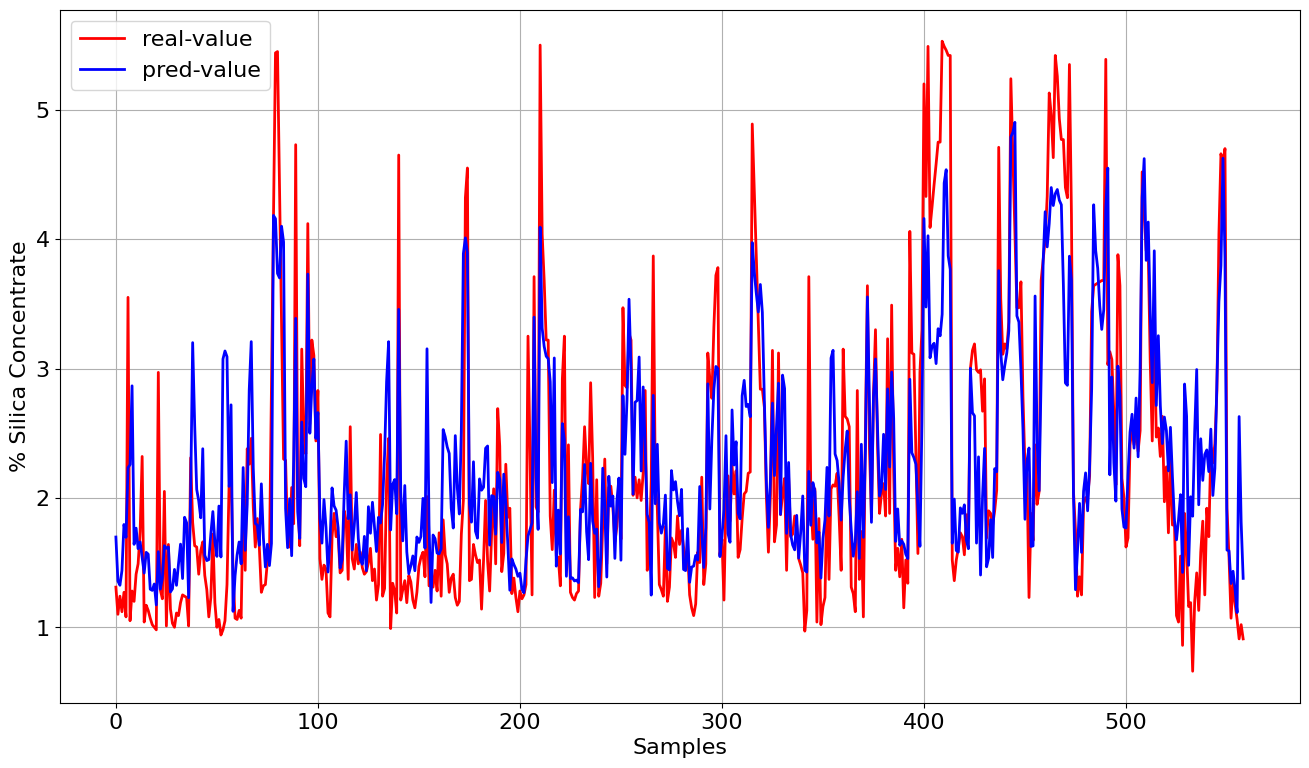

In [681]:
prediction = nn.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_agg.loc[len(result_znorm_agg)] = ['NN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

In [682]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))
rnn = Sequential([
    Input(shape=(None,number_features)),
    SimpleRNN(2048, activation='relu'),
    Dense(1)
])

rnn.summary()

Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_40 (SimpleRNN)            │ (None, 2048)                │       4,206,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,208,641 (16.05 MB)

 Trainable params: 4,208,641 (16.05 MB)

 Non-trainable params: 0 (0.00 B)

### RNN

In [683]:
# Compile the model
rnn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
rnn.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.3979 - val_loss: 0.4003 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4983 - val_loss: 0.3738 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4563 - val_loss: 0.3697 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4546 - val_loss: 0.3745 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4317 - val_loss: 0.3657 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4178 - val_loss: 0.3724 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4411 - val_loss: 0.3693 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4046 - val_loss: 0.3702 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4179 - val_loss: 0.3692 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

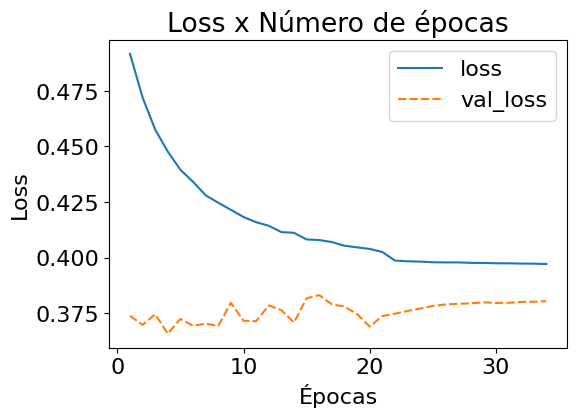

In [684]:
# Plot the training and validation loss
history_f = pd.DataFrame(rnn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MAE =  0.4669910633926527
MSE =  0.3657042295356636
R2 =  0.6937245750818674


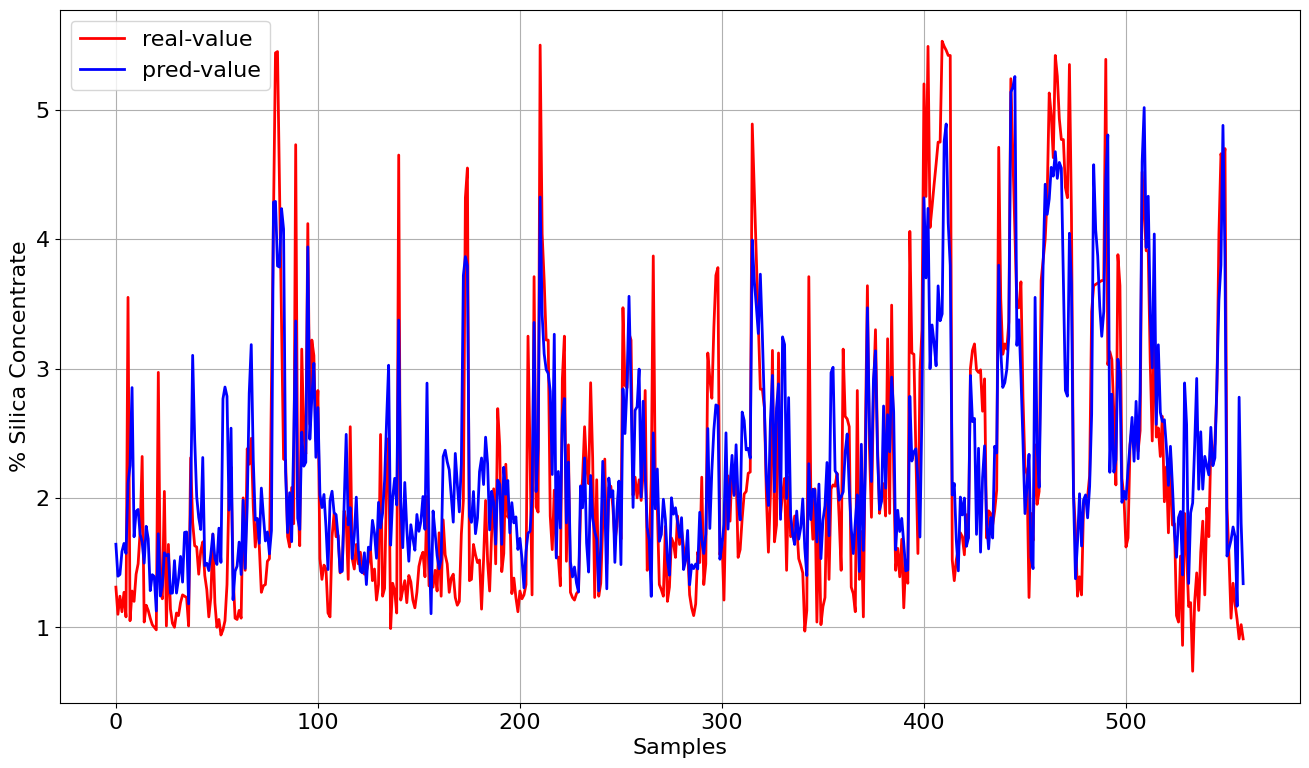

In [685]:
prediction = rnn.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_agg.loc[len(result_znorm_agg)] = ['RNN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### LSTM

In [686]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))

lstm = Sequential([
    Input(shape=(None,number_features)),
    LSTM(2048, activation='relu'),
    Dense(1)
])

lstm.summary()

Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 2048)                │      16,826,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,828,417 (64.20 MB)

 Trainable params: 16,828,417 (64.20 MB)

 Non-trainable params: 0 (0.00 B)

In [687]:
# Compile the model
lstm.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
lstm.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.4294 - val_loss: 1.2026 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1954 - val_loss: 0.9530 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9475 - val_loss: 0.8309 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7647 - val_loss: 0.7084 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6624 - val_loss: 0.6014 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5679 - val_loss: 0.5205 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5288 - val_loss: 0.4645 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4720 - val_loss: 0.4263 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4406 - val_loss: 0.4023 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

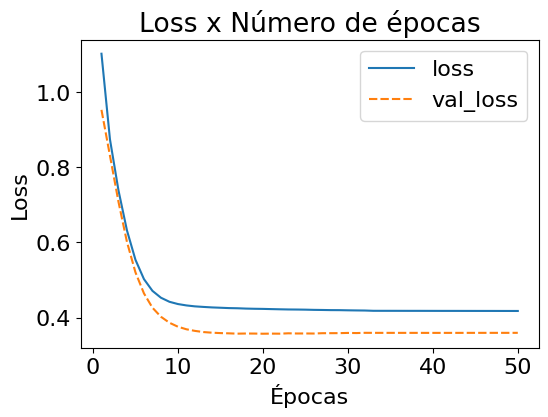

In [688]:
# Plot the training and validation loss
history_f = pd.DataFrame(lstm.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE =  0.45324743825335834
MSE =  0.35711401904402645
R2 =  0.7009188325062425


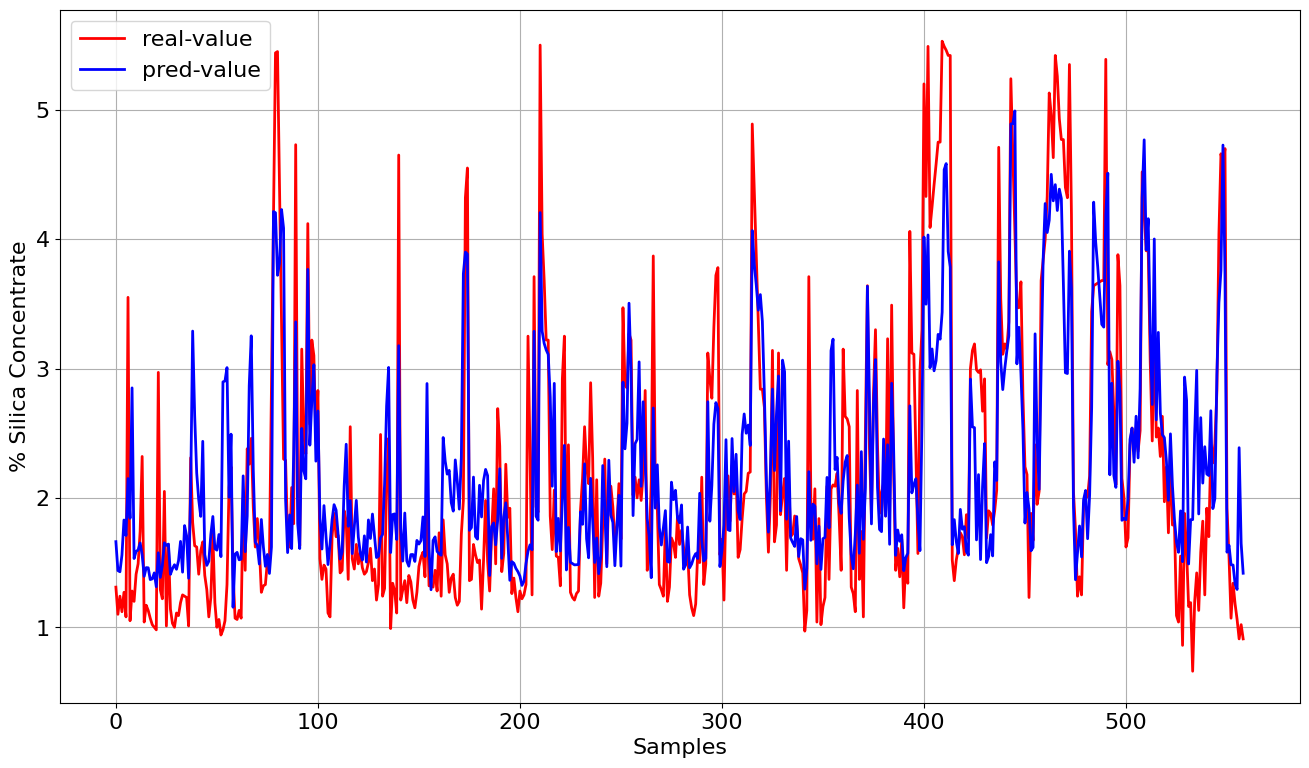

In [689]:
prediction = lstm.predict(x_val_reshaped)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_agg.loc[len(result_znorm_agg)] = ['LSTM', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Resultados

---



### Preparando os dados


In [690]:
# Combine the dataframes
combined_df = pd.concat([result_minmax_full, result_minmax_agg, result_znorm_full, result_znorm_agg], keys=['MinMaxFull','MinMaxAgg','ZnormFull','ZnormAgg'])

# Reset the index for easier plotting
combined_df = combined_df.reset_index()

# Rename columns for clarity
combined_df.columns = ['Result', 'Index', 'Model', 'MAE', 'MSE', 'R2']


### MAE

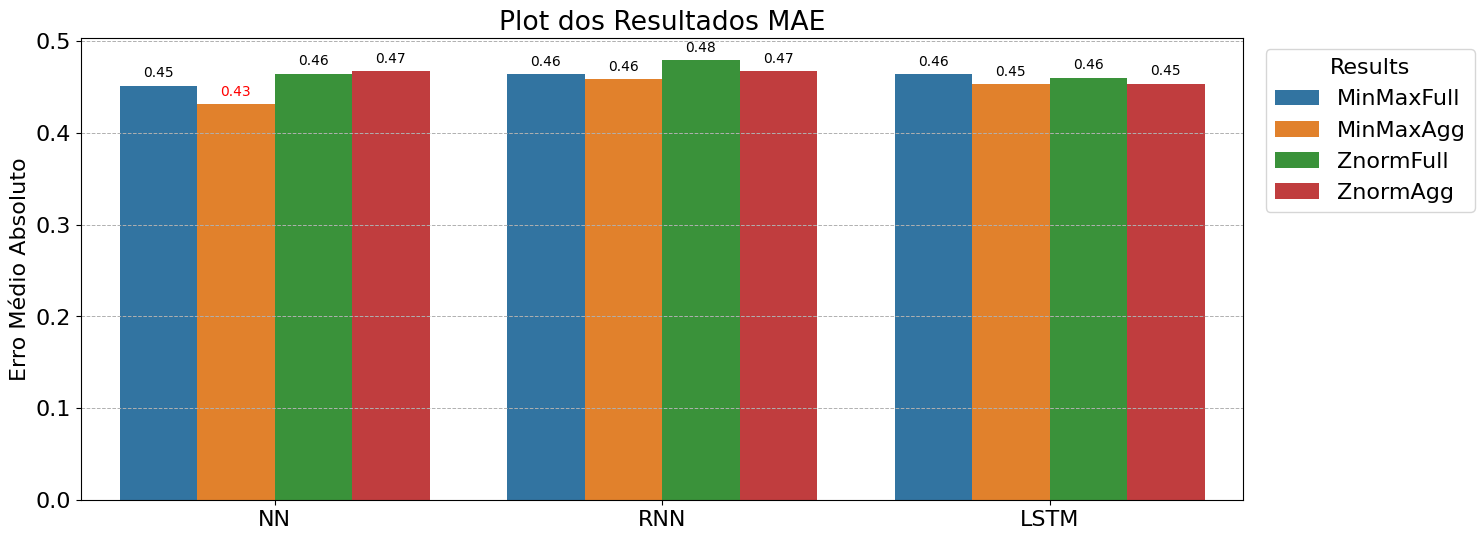

In [691]:
# Melt the dataframe for seaborn
combined_df_melted_mae  = combined_df.melt(id_vars=['Result', 'Model'], value_vars=['MAE'])

# Plotting using seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Model', y='value', hue='Result', data=combined_df_melted_mae)

plt.title('Plot dos Resultados MAE')
plt.ylabel('Erro Médio Absoluto')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
# Move the legend outside the plot
plt.legend(title='Results', bbox_to_anchor=(1.01, 1), loc='upper left')

# Show the values on top of the bars
min = combined_df_melted_mae['value'].min()
for p in ax.patches:
  if (p.get_height()) > 0.01:
    if p.get_height() == min:
      ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=10, color='red')
    else:
      ax.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9),
                  textcoords='offset points', fontsize=10, color='black')
plt.show()

### MSE

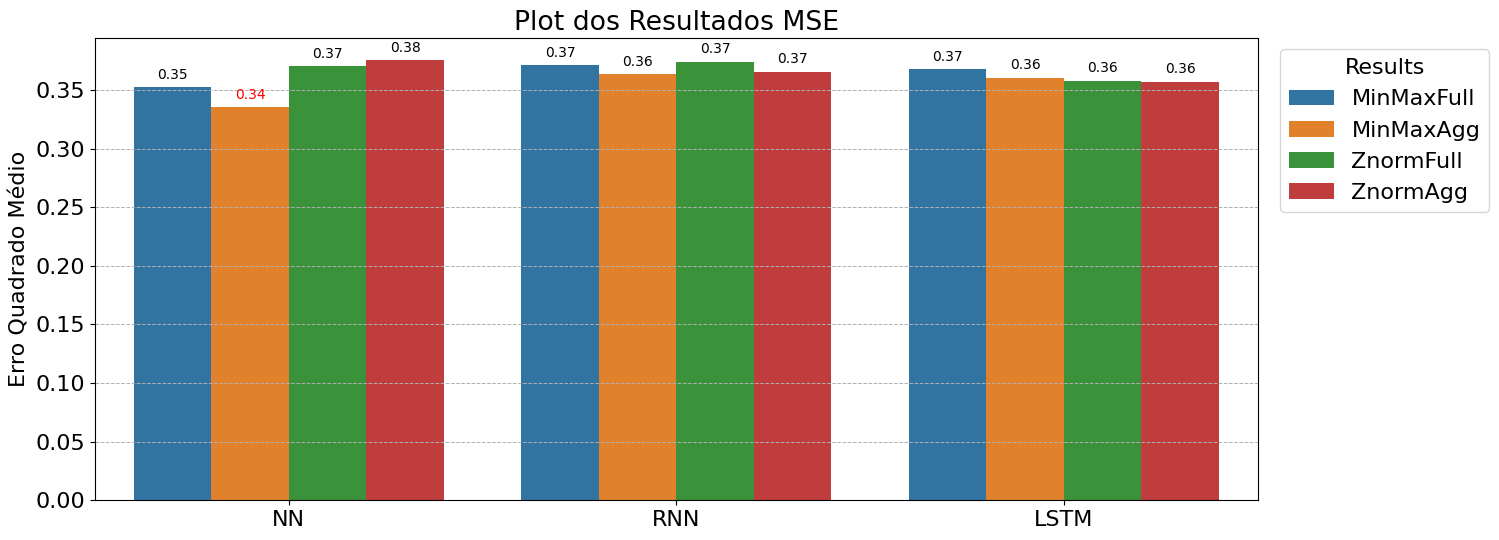

In [692]:
# Melt the dataframe for seaborn
combined_df_melted_mse  = combined_df.melt(id_vars=['Result', 'Model'], value_vars=['MSE'])

# Plotting using seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Model', y='value', hue='Result', data=combined_df_melted_mse)

plt.title('Plot dos Resultados MSE')
plt.ylabel('Erro Quadrado Médio')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
# Move the legend outside the plot
plt.legend(title='Results', bbox_to_anchor=(1.01, 1), loc='upper left')

# Show the values on top of the bars
min = combined_df_melted_mse['value'].min()
for p in ax.patches:
  if (p.get_height()) > 0.01:
    if p.get_height() == min:
      ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=10, color='red')
    else:
      ax.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9),
                  textcoords='offset points', fontsize=10, color='black')
plt.show()

### R2

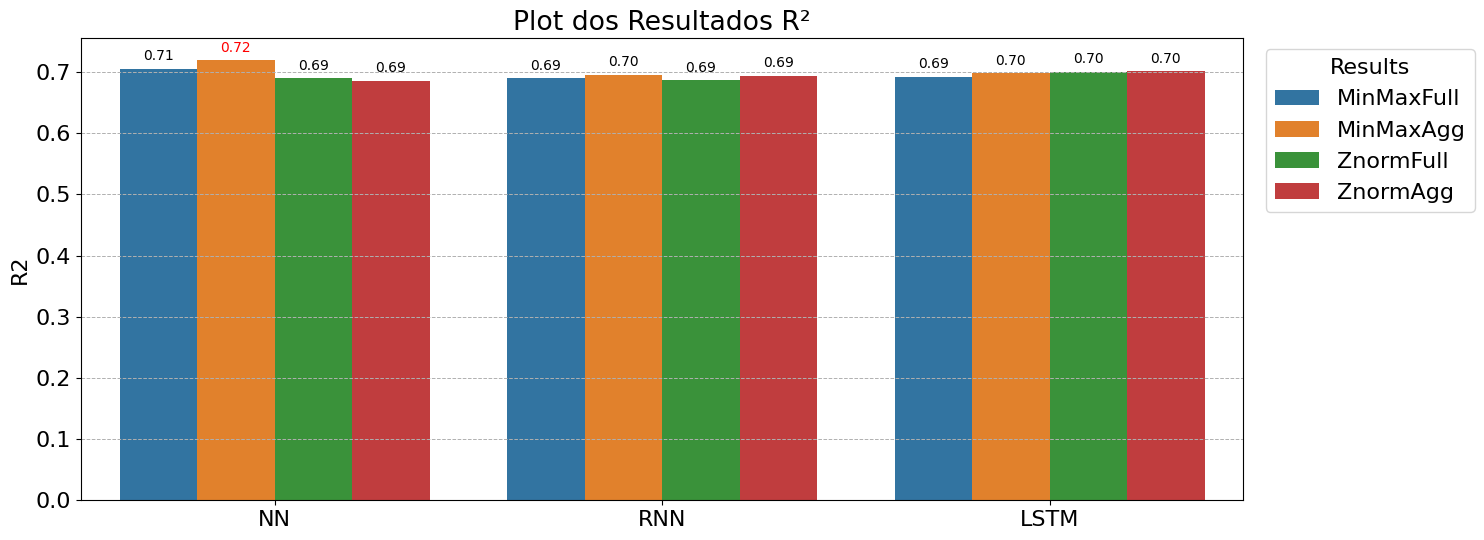

In [693]:
# Melt the dataframe for seaborn
combined_df_melted_r2  = combined_df.melt(id_vars=['Result', 'Model'], value_vars=['R2'])

# Plotting using seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Model', y='value', hue='Result', data=combined_df_melted_r2)

plt.title('Plot dos Resultados R²')
plt.ylabel('R2')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
# Move the legend outside the plot
plt.legend(title='Results', bbox_to_anchor=(1.01, 1), loc='upper left')

# Show the values on top of the bars
max = combined_df_melted_r2['value'].max()
for p in ax.patches:
  if (p.get_height()) > 0.01:
    if p.get_height() == max:
      ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=10, color='red')
    else:
      ax.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9),
                  textcoords='offset points', fontsize=10, color='black')
plt.show()

# TESTE


In [696]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [697]:
nn = Sequential([
  Input(shape=(number_features,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1)
])

nn.summary()

Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_279 (Dense)                    │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [698]:
# Compile the model
nn.compile(optimizer=otimizador,
                     loss=loss_f)

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=reduce_on_plateau_patience,
            min_delta=0.01,
            min_lr=0.00001,
        )


# Train the model
nn.fit(
    x_train,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.8427 - val_loss: 1.0949 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1039 - val_loss: 0.8444 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6387 - val_loss: 0.4814 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4945 - val_loss: 0.3746 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4818 - val_loss: 0.4386 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4479 - val_loss: 0.6502 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5199 - val_loss: 0.4037 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4552 - val_loss: 0.4399 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4222 - val_loss: 0.3844 - learning_rate: 0.0100
Epoch 10/

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE =  0.42911857111935964
MSE =  0.34154030327139434
R2 =  0.7139617399450584


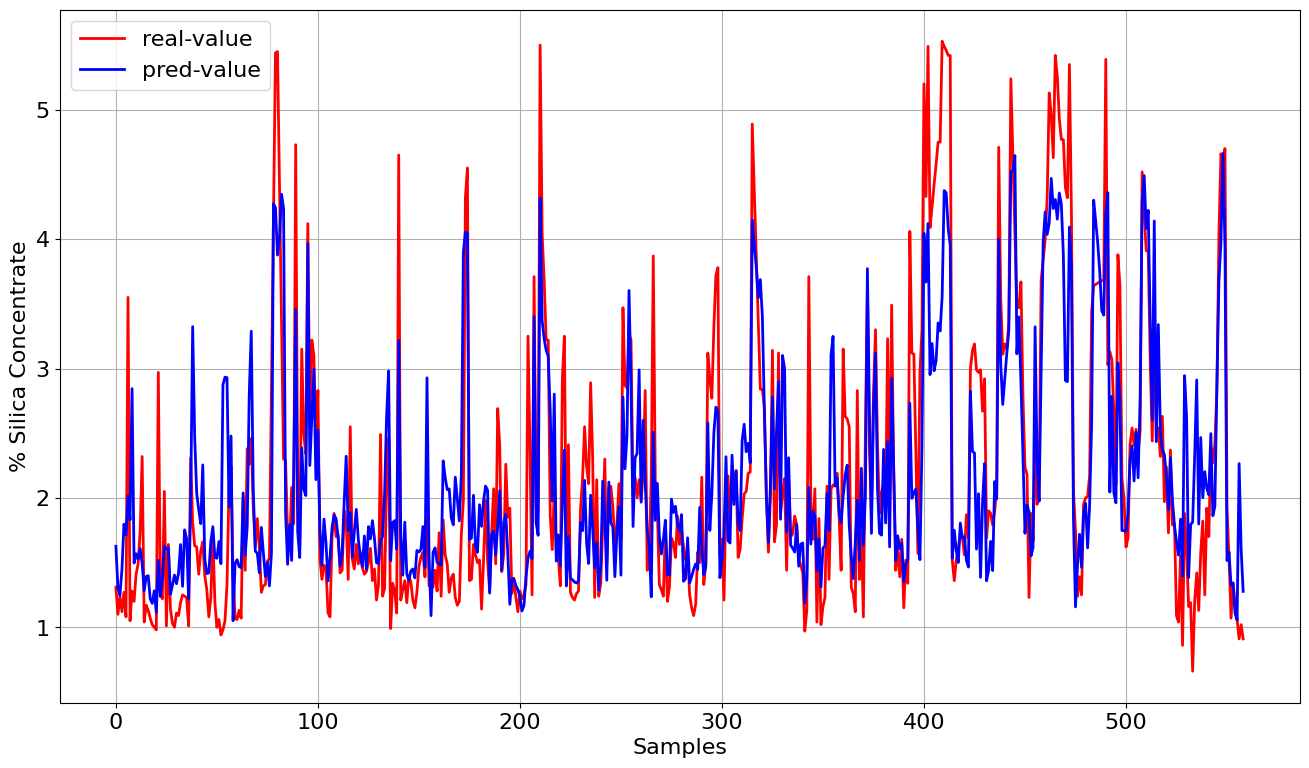

In [699]:
prediction = nn.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_agg.loc[len(result_minmax_agg)] = ['NN', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
TESTE
MAE =  0.4678308263036788
MSE =  0.37916344242096617
R2 =  0.7166203218066914


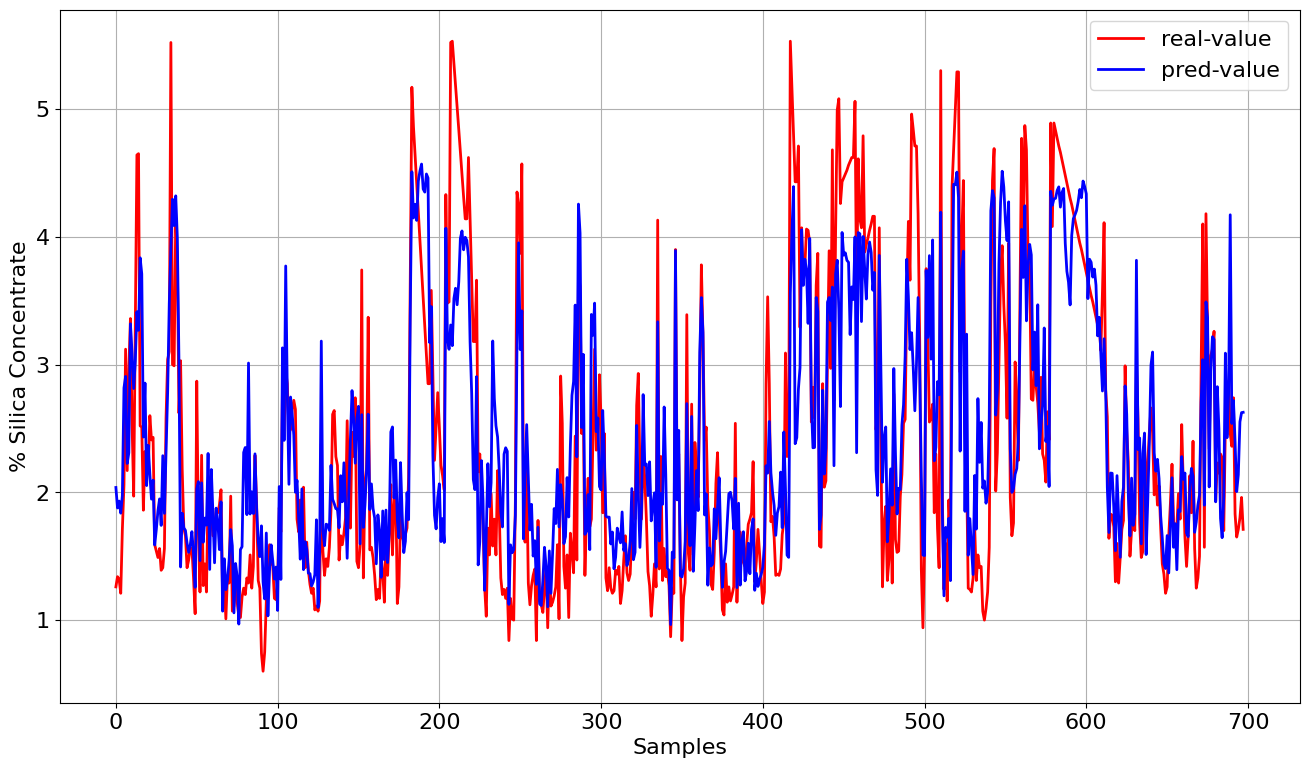

In [701]:
prediction = nn.predict(x_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print('TESTE')
print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_test)), y_test,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_test)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()